In [4]:
import numpy as np
my_array = np.array([1,2,3,4])
len(my_array)

4

In [5]:
my_array.shape

(4,)

In [6]:
my_array.dtype

dtype('int64')

In [7]:
print(len(my_array))
print(my_array[2:4])
for element in my_array:
    print(element)

4
[3 4]
1
2
3
4


In [8]:
print(my_array.mean())
print(np.mean(my_array))

2.5
2.5


In [10]:
np.ones(10)
# generates 10 floating point ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
np.dtype(float).itemsize

8

In [12]:
np.ones(10, dtype='int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.random.random(10)

array([0.83056262, 0.31995164, 0.26967691, 0.50745074, 0.31823871,
       0.41566966, 0.73743187, 0.50603295, 0.59580065, 0.8132371 ])

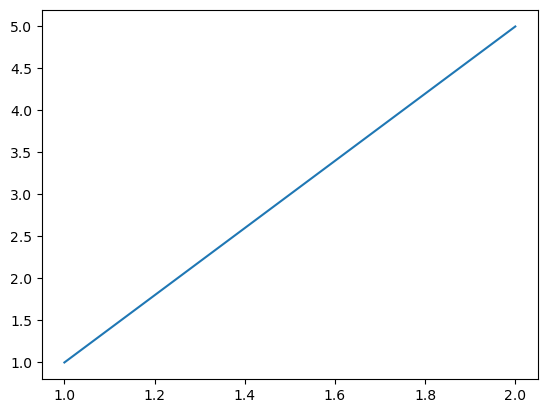

In [17]:
import matplotlib.pyplot as plt
# x = [1, 2]
# y = [1, 5]
# print(plt.__version__)
# plt.plot(x, y)
# plt.show()

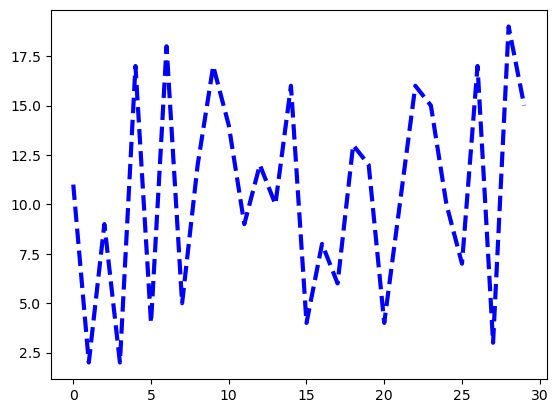

In [18]:
# x = np.random.randint(low=1, high=20, size=30)
# plt.plot(x, color ='blue', linewidth=3, linestyle='dashed')
# plt.show()

In [19]:
import torch

# x = torch.empty(3, 4)
# print(type(x))
# print(x)


<class 'torch.Tensor'>
tensor([[-1.4981e+28,  4.5566e-41, -1.4981e+28,  4.5566e-41],
        [-1.2365e-31,  9.9287e+28, -4.0266e-31,  4.5566e-41],
        [-2.8554e-31,  4.5566e-41, -8.5413e-29, -1.2205e+16]])


In [20]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


In [21]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')

print('Device: {}'.format(my_device))
# x = torch.rand(2, 2, device=my_device)
# print(x)

Device: cpu
tensor([[0.1500, 0.3324],
        [0.1797, 0.5516]])


In [23]:
# from PIL import Image

Bertrand, method method3 probability: 0.261


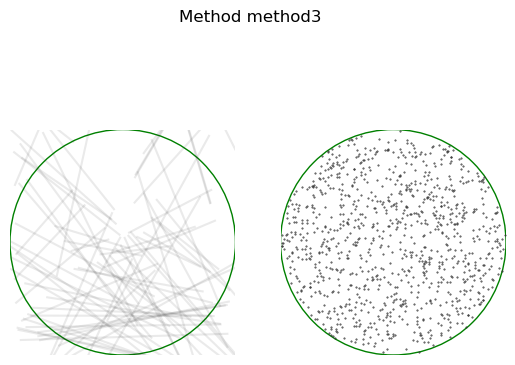

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

TAU = 2 * np.pi
max_chords = 100
num_chords = 1000
radius = 1

tlen = radius * np.sqrt(3)
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'aspect': 'equal'})
for ax in axes:
    circle = plt.Circle((0,0), radius, facecolor='none', edgecolor='green')
    # triangle = plt.Polygon([[-radius/2,radius/2],[-radius/3,radius/3]])
    # ax.add_artist(triangle)
    ax.add_artist(circle)
    ax.set_xlim((-radius,radius))
    ax.set_ylim((-radius,radius))
    ax.axis('off')

def get_chords_from_midpoints(midpoints):
    chords = np.zeros((num_chords, 2, 2))
    for i, (x0, y0) in enumerate(midpoints.T):
        m = -x0/y0
        c = y0 + x0**2/y0
        a, b, c = m**2 + 1, 2*m*c, c**2 - radius**2
        d = np.sqrt(b**2 - 4*a*c)
        x2 = np.array(((-b + d), (-b - d))) / 2 / a
        y2 = m * x2 + c
        chords[i] = (x2, y2)
    return chords

def method1():
    angles = np.random.random((num_chords, 2)) * TAU
    chords = np.array((radius * np.cos(angles), radius * np.sin(angles)))
    chords = np.swapaxes(chords, 0, 1)

    midpoints = np.mean(chords, axis=2).T
    return chords, midpoints

def method2():
    angles = np.random.random(num_chords) * TAU
    radii = np.random.random(num_chords) * radius
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints

def method3():
    angles = np.random.random(num_chords) * TAU
    radii = np.sqrt(np.random.random(num_chords)) * radius
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints

def plot_sol(method):
    chords, midpoints = method()

    success = [False] * num_chords
    for i, chord in enumerate(chords):
        x, y = chord
        if np.hypot(x[0]-x[1], y[0]-y[1]) > tlen:
            success[i] = True
        if i < max_chords:
            line = Line2D(*chord, color=(.2, .2, .2), alpha=0.1)
            axes[0].add_line(line)
    axes[1].scatter(*midpoints, s=0.2, color=(.2, .2, .2))
    fig.suptitle('Method {}'.format(method.__name__))

    prob = np.sum(success)/num_chords
    print('Bertrand, method {} probability: {}'.format(method.__name__, prob))

plot_sol(method3)

